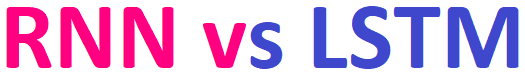

**Introduction**

The aim of this study is to compare to accuracies of RNN and LSTM. I compare results of RNN and LSTM to each others and I changed hyperparameters in these methods and I compared them again with their modified versions.

The main differece of LSTM from RNN is that LSTM can store data longer than RNN.

### **Content**
* [Import Data](#3)
* [RNN](#4)
* [Visualizing of RNN](#5)
* [LSTM](#6)
* [Visualizing of LSTM](#7)
* [Visualizing of RNN vs LSTM](#8)
* [Modified RNN](#9)
* [Visualizing of RNN vs Modified RNN](#10)
* [Modified LSTM](#11)
* [Visualizing of LSTM vs Modified LSTM](#12)
* [Visualizing of RNN vs Modified RNN vs LSTM vs Modified LSTM](#13)
* [Visualizing of Modified RNN vs Modified LSTM](#14)
* [Conclusion](#15)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="3"></a>
### Import Data

In [ ]:
data = pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Train.csv',sep=",")

# We assign column "Open" to variable "Data"
data = data.loc[:,["Open"]].values


train = data[:len(data)-50] 
test = data[len(train):] # last 50 data will be our test data

# reshape
train=train.reshape(train.shape[0],1)

In [ ]:
# feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [ ]:
# We add first 50 locution to "X_train" and we 51. locution to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

<a id="4"></a>
### RNN


In [ ]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [ ]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

<a id="5"></a>
### Visualization of RNN


In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

<a id="6"></a>
### LSTM

In [ ]:
# ------ LSTM --------------

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

In [ ]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

<a id="7"></a>
### Visualization of LSTM

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


<a id="8"></a>
### Visualization of RNN vs LSTM

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

LSTM looks greatly successful from the RNN.

Now we change hyperparemeter like "units, number of layers, epochs, batch_size, activation" in RNN

<a id="9"></a>
### Modified RNN

In [ ]:
# RNN Modified

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 

# Initialising the RNN
regressor = Sequential()


regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1)) 

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 16)

In [ ]:
predicted_data_modified = regressor.predict(X_test)
predicted_data_modified = scaler.inverse_transform(predicted_data_modified)


<a id="10"></a>
### Visualization of RNN vs Modified RNN

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="gray",label="Real values")
plt.plot(predicted_data,color="cyan",label="RNN result")
plt.plot(predicted_data_modified,color="blue",label="RNN Modified Result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

It looks Modified RNN more successful than RNN.

<a id="11"></a>
### Modified LSTM

In [ ]:
#  LSTM Modified

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler 


model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=4) #degistirdim train leri RNN kilerle

In [ ]:
predicted_data2_modified=model.predict(X_test)
predicted_data2_modified=scaler.inverse_transform(predicted_data2_modified)


<a id="12"></a>
### Visualization of LSTM vs Modified LSTM

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray",label="Real values", linestyle="dashed")
plt.plot(predicted_data2,color="Magenta",label="LSTM predicted")
plt.plot(predicted_data2_modified,color="c", label="Modified LSTM predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


Modified LSTM looks more successful than LSTM.

<a id="13"></a>
### Visualization of LSTM vs Modified LSTM vs RNN vs Modified RNN

In [ ]:
# visualization LSTM vs LSTM modified vs RNN vs RNN modified

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray",label="Real value", linestyle="dashed")
plt.plot(predicted_data2,color="blue",label="LSTM predicted")
plt.plot(predicted_data2_modified,color="red", linestyle="dashed", label="LSTM Modified predicted")
plt.plot(predicted_data,color="c",label="RNN predicted")
plt.plot(predicted_data_modified,color="green", linestyle="dashed", label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


In [ ]:
# Visualization Modified RNN vs Modified LSTM

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray", linestyle= "dashed", label="true result")
plt.plot(predicted_data2_modified,color="Magenta",  label="LSTM Modified predicted")
plt.plot(predicted_data_modified,color="c",  label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

### Conclusion
Changing hyperparameter can increase to accuracy.

LSTM looks more successful than RNN in predict to values about time.